In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

store = pd.read_csv('Data/store.csv')
train_1 = pd.read_csv('Data/train_1.csv')
train_2 = pd.read_csv('Data/train_2.csv')
train = pd.concat([train_1, train_2], axis=0)
train= train.drop(columns=['Unnamed: 0'])

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Most of the fields are self-explanatory. The following are descriptions for those that aren't.

__Id__ - an Id that represents a (Store, Date) duple within the test set

__Store__ - a unique Id for each store

__Sales__ - the turnover for any given day

__Customers__ - the number of customers on a given day

__Open__ - an indicator for whether the store was open: 0 = closed, 1 = open

__StateHoliday__ - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

__SchoolHoliday__ - indicates if the (Store, Date) was affected by the closure of public schools

__StoreType__ - differentiates between 4 different store models: a, b, c, d

__Assortment__ - describes an assortment level: a = basic, b = extra, c = extended

__CompetitionDistance__ - distance in meters to the nearest competitor store

__CompetitionOpenSince[Month/Year]__ - gives the approximate year and month of the time the nearest competitor was opened

__Promo__ - indicates whether a store is running a promo on that day

__Promo2__ - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

__Promo2Since[Year/Week]__ - describes the year and calendar week when the store started participating in Promo2

__PromoInterval__ - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [8]:
data = train.merge(store,how='left')

In [9]:
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [11]:
X = data.loc[:, data.columns != 'Sales']

In [12]:
y = data.loc[:, data.columns == 'Sales']

In [13]:
data = pd.concat([X, y], axis=1)

In [14]:
data.fillna(0, inplace = True)

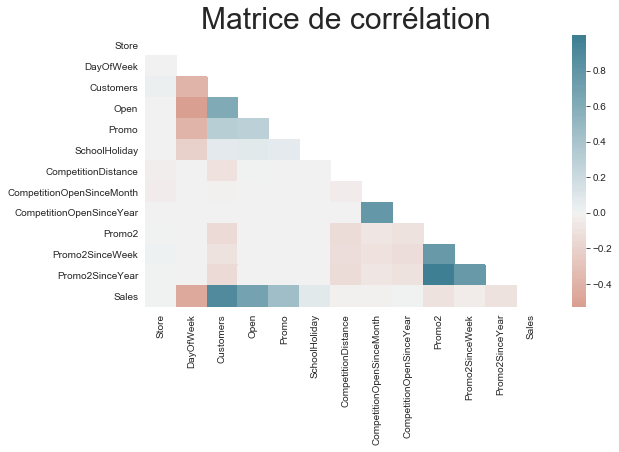

In [28]:
## Plotting heatmap. 
sns.set_style('whitegrid')
plt.subplots(figsize = (9,5))

# Generate a mask for the upper triangle 
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data.corr(), cmap=sns.diverging_palette(20, 220, n=200), mask = mask, annot=False, center = 0);
## Give title. 
plt.title("Matrice de corrélation", fontsize = 30);

<AxesSubplot:xlabel='Promo'>

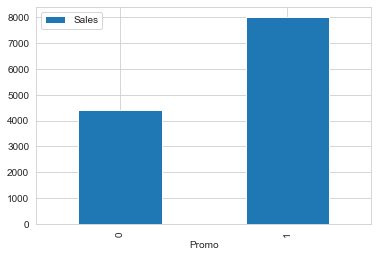

In [18]:
data[['Sales','Promo']].groupby('Promo').mean().plot(kind='bar')

<AxesSubplot:xlabel='Promo2'>

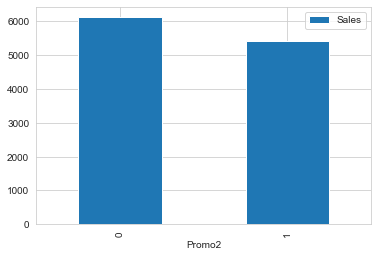

In [20]:
data[['Sales','Promo2']].groupby('Promo2').mean().plot(kind='bar')

In [25]:
sales['Promo2SinceWeek'].head(10)

0     NaN
1    13.0
2    14.0
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
Name: Promo2SinceWeek, dtype: float64